In [290]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [291]:
#load data
df_prod = pd.read_csv('crop_production.csv')

In [292]:
df_prod.shape

(246091, 7)

In [293]:
df_prod.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [294]:
#check how many features have null values
df_prod.isnull().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [295]:
df_prod[df_prod['Production'].isnull()]
#a total of 3730 production values are NAN

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,NaN
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,NaN
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,NaN
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,NaN
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,NaN


In [296]:
df_prod.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [297]:
#removing rows which have NAN or 0 production values
df_prod = df_prod[~df_prod.Production.isnull()]
df_prod = df_prod[df_prod.Production !=0]

In [298]:
df_prod.reset_index(drop=True, inplace=True)

In [299]:
df_prod.iloc[46]

State_Name       Andaman and Nicobar Islands
District_Name                       NICOBARS
Crop_Year                               2005
Season                           Whole Year 
Crop                                  Banana
Area                                      22
Production                               582
Name: 46, dtype: object

In [300]:
df_prod.shape

(238838, 7)

In [301]:
df_prod.isnull().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [302]:
df_prod['unit_production'] = df_prod.Production / df_prod.Area

In [303]:
df_prod.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,unit_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


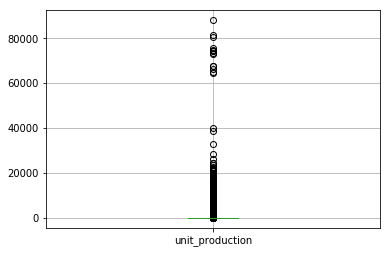

In [304]:
df_prod.boxplot(column='unit_production')
plt.show()

In [305]:
df_prod = df_prod[df_prod.unit_production < 100]

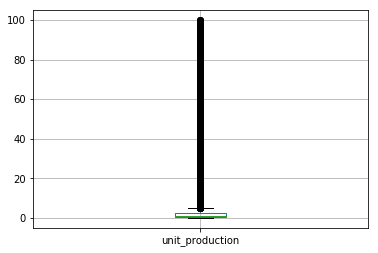

In [306]:
df_prod.boxplot(column='unit_production')
plt.show()

In [307]:
#values greater than 10 metric ton / hectare are probably due to entering quintels instead of tons
def fun(x):
    if x>10:
        return x/10
    else:
        return x
df_prod.unit_production = df_prod.unit_production.apply(fun)

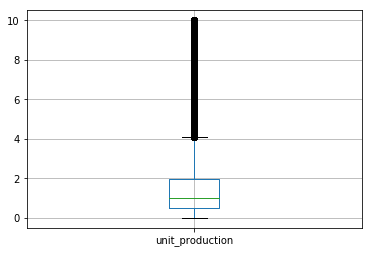

In [308]:
df_prod.boxplot(column='unit_production')
plt.show()

In [309]:
df_prod[df_prod.unit_production >4].shape

(23777, 8)

In [310]:
pivot = df_prod.pivot_table(index='Crop', values='unit_production', aggfunc=np.median)

In [311]:
df_prod['profit_index'] = df_prod.unit_production

In [312]:
df_prod.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,unit_production,profit_index
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,0.229167


In [313]:
ind_avg_prod = []
for i in df_prod.Crop:
    ind_avg_prod.append(pivot.ix[i][0])
df_prod.profit_index = df_prod.unit_production / ind_avg_prod

/home/knrai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [314]:
df_prod.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'unit_production', 'profit_index'],
      dtype='object')

In [315]:
del df_prod['Crop_Year']

In [316]:
df_prod.columns

Index(['State_Name', 'District_Name', 'Season', 'Crop', 'Area', 'Production',
       'unit_production', 'profit_index'],
      dtype='object')

In [317]:
df_prod.Season = df_prod.Season.apply(lambda x: str(x.strip()))

In [318]:
#final = pd.pivot_table(df_prod, index = ['State_Name', 'District_Name', 'Season', 'Crop'])
final = df_prod.pivot_table(index=['State_Name', 'District_Name', 'Season'], values='profit_index', aggfunc=np.median)

In [319]:
def predict(row):
    target = df_prod[np.logical_and(np.logical_and(df_prod.State_Name==row[0] , df_prod.District_Name == row[1]) , df_prod.Season == row[2])].groupby(['Crop']).median()
    return np.array(target.sort_values(by='profit_index', ascending=False)['profit_index'].index)

In [320]:
row = ['Bihar', 'PATNA', 'Rabi']
response = predict(row)
response

array(['Potato', 'Other  Rabi pulses', 'Linseed', 'Sunflower', 'Masoor',
       'Khesari', 'Safflower', 'Gram', 'Maize', 'Wheat',
       'Rapeseed &Mustard', 'Moong(Green Gram)', 'Peas & beans (Pulses)',
       'Barley'], dtype=object)